In [ ]:
# pip install JPype1
# pip install konlpy

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from konlpy.tag import Okt

# 한글 폰트 설정 (필요한 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 불러오기
file_path = "C:/Users/kicha/OneDrive/Desktop/Aiffel/DKTC-main/DKTC-main/data/train.csv"
df = pd.read_csv(file_path)

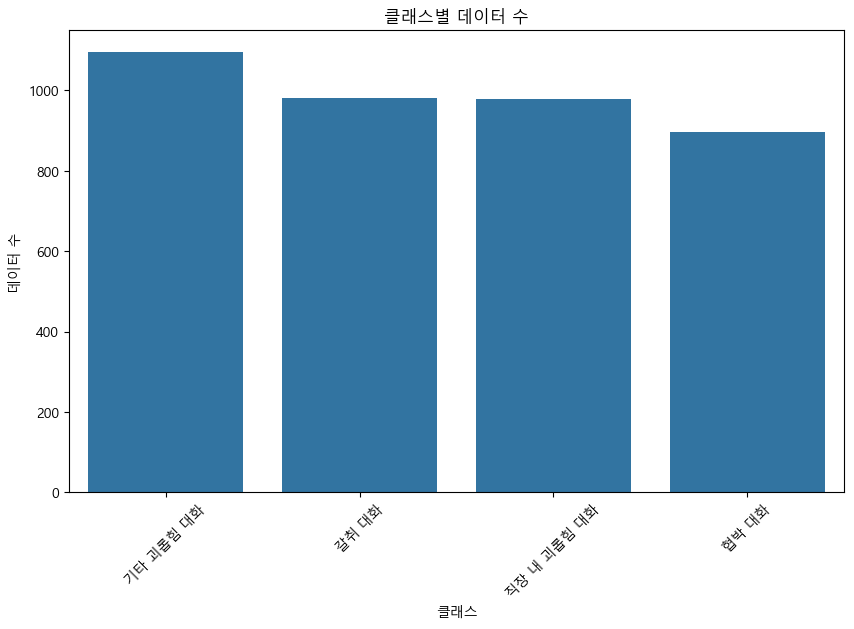

In [3]:
# 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class', order=df['class'].value_counts().index)
plt.title('클래스별 데이터 수')
plt.xlabel('클래스')
plt.ylabel('데이터 수')
plt.xticks(rotation=45)
plt.show()

              count        mean         std   min    25%    50%    75%    max
class                                                                        
갈취 대화         981.0  216.185525   99.727487  45.0  147.0  191.0  264.0  678.0
기타 괴롭힘 대화    1094.0  210.078611  104.853740  41.0  143.0  185.0  246.0  874.0
직장 내 괴롭힘 대화   979.0  237.557712  103.616671  41.0  167.5  217.0  282.5  843.0
협박 대화         896.0  246.073661  105.955937  57.0  176.0  220.0  288.0  818.0


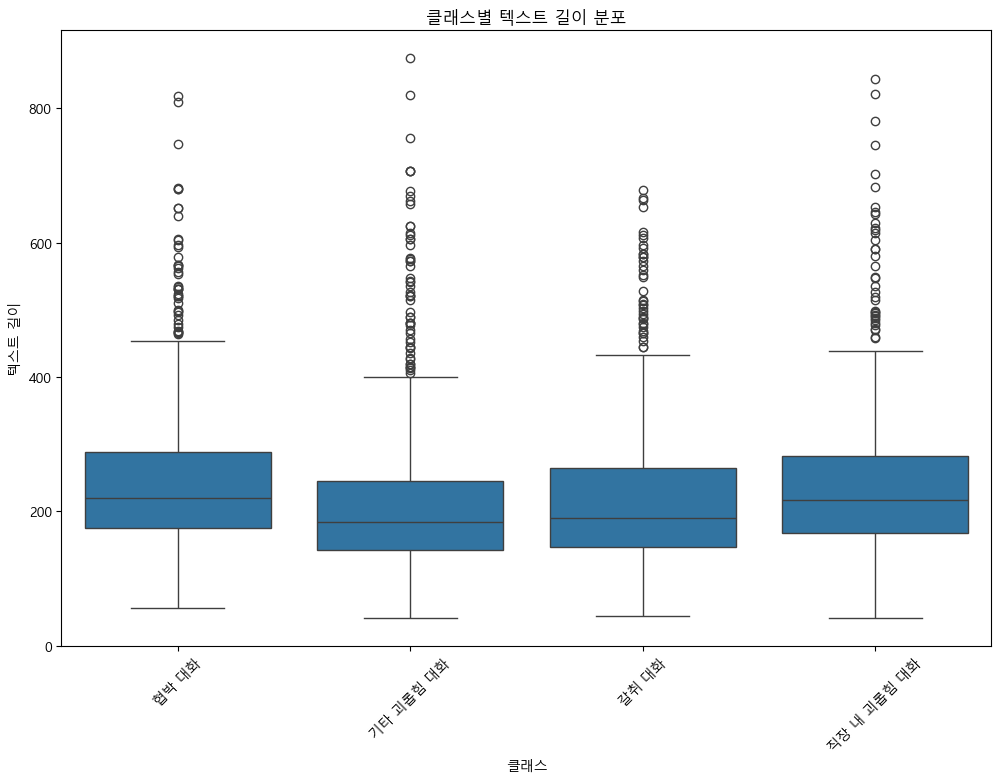

In [4]:
# 'conversation' 열의 길이 계산
df['text_length'] = df['conversation'].str.len()

# 클래스별 텍스트 길이의 평균, 중앙값, 분산 등 통계량 확인
print(df.groupby('class')['text_length'].describe())

# 클래스별 텍스트 길이 분포 시각화
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='class', y='text_length')
plt.title('클래스별 텍스트 길이 분포')
plt.xlabel('클래스')
plt.ylabel('텍스트 길이')
plt.xticks(rotation=45)
plt.show()

### 텍스트 길이 통계량 ###
count    3950.000000
mean      226.570886
std       104.560310
min        41.000000
25%       156.000000
50%       203.000000
75%       270.000000
max       874.000000
Name: text_length, dtype: float64




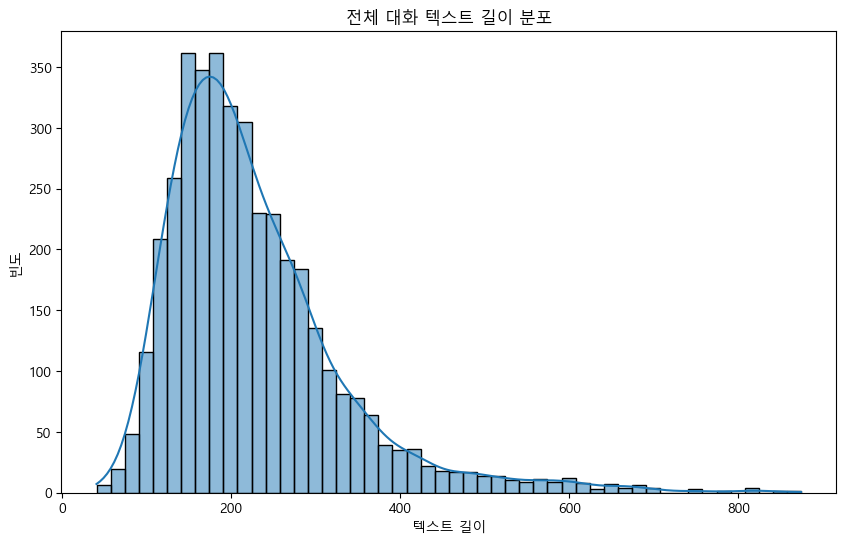

### 클래스별 텍스트 길이 통계량 ###
              count        mean         std   min    25%    50%    75%    max
class                                                                        
갈취 대화         981.0  216.185525   99.727487  45.0  147.0  191.0  264.0  678.0
기타 괴롭힘 대화    1094.0  210.078611  104.853740  41.0  143.0  185.0  246.0  874.0
직장 내 괴롭힘 대화   979.0  237.557712  103.616671  41.0  167.5  217.0  282.5  843.0
협박 대화         896.0  246.073661  105.955937  57.0  176.0  220.0  288.0  818.0




In [6]:
# 'conversation' 열의 텍스트 길이 계산
df['text_length'] = df['conversation'].str.len()

# 통계 정보 출력
print("### 텍스트 길이 통계량 ###")
print(df['text_length'].describe())
print("\n")

# 텍스트 길이 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('전체 대화 텍스트 길이 분포')
plt.xlabel('텍스트 길이')
plt.ylabel('빈도')
plt.show()

# 클래스별 텍스트 길이 통계량 비교
print("### 클래스별 텍스트 길이 통계량 ###")
print(df.groupby('class')['text_length'].describe())
print("\n")


In [9]:
# 모든 대화 텍스트를 하나로 합치기
all_text = ' '.join(df['conversation'])

# 불필요한 문자(숫자, 특수문자) 제거 및 한글만 추출
processed_text = re.sub(r'[^가-힣\s]', '', all_text)

# 띄어쓰기 기준으로 단어 분리
words = processed_text.split()

# 불용어(분석에 불필요한 단어) 리스트
stopwords = ['그리고', '그런', '뭐', '이건', '있는', '하면', '내가', '하는', '있어', '그냥', '진짜', '너무']

# 불용어 제거 및 한 글자 단어 제거
filtered_words = [word for word in words if word not in stopwords and len(word) > 1]

# 단어 빈도 계산
word_counts = Counter(filtered_words)

# 가장 많이 등장하는 단어 30개 출력
print("### 단어 빈도 분석 (KoNLPy 없이) ###")
print(word_counts.most_common(30))

### 단어 빈도 분석 (KoNLPy 없이) ###
[('죄송합니다', 1346), ('아니', 1326), ('지금', 1210), ('그럼', 1053), ('그래', 939), ('제가', 862), ('무슨', 799), ('제발', 759), ('이거', 757), ('그렇게', 666), ('우리', 648), ('니가', 635), ('어떻게', 620), ('아니야', 554), ('오늘', 541), ('없어', 506), ('정말', 503), ('빨리', 496), ('그게', 460), ('너가', 456), ('그건', 453), ('이렇게', 446), ('나도', 446), ('여기', 390), ('안돼', 368), ('근데', 364), ('나한테', 344), ('이게', 340), ('이제', 337), ('그래도', 319)]


In [11]:
# 전체 행을 기준으로 중복 데이터 확인
# `keep=False`는 모든 중복 행을 True로 표시합니다.
duplicate_rows = df[df.duplicated(keep=False)]

# 중복된 행의 개수 출력
print(f"전체 데이터셋에서 중복된 행의 수: {df.duplicated().sum()}개")
print("-" * 40)

# 중복된 데이터가 있다면 일부를 출력
if not duplicate_rows.empty:
    print("중복된 행의 예시:")
    print(duplicate_rows.head())
else:
    print("중복된 행이 없습니다.")

전체 데이터셋에서 중복된 행의 수: 0개
----------------------------------------
중복된 행이 없습니다.


In [12]:
# 'conversation' 열을 기준으로 중복된 행 확인
duplicate_conversations = df[df.duplicated(subset=['conversation'], keep=False)].sort_values(by='conversation')

# 'conversation' 기준으로 중복된 행의 총 개수 출력
print(f"중복된 대화 내용의 수: {df.duplicated(subset=['conversation']).sum()}개")
print("-" * 40)

# 중복된 대화 내용이 있는 행들 출력
if not duplicate_conversations.empty:
    print("중복된 'conversation' 행의 예시:")
    print(duplicate_conversations)
else:
    print("중복된 'conversation' 내용이 없습니다.")

중복된 대화 내용의 수: 104개
----------------------------------------
중복된 'conversation' 행의 예시:
       idx        class                                       conversation  \
2625  2625        갈취 대화  100만원만 어떻게 해주라.\n저 번에 빌린 돈도 안 갚았잖아. 그 동안 빌린 돈이...   
3071  3071        갈취 대화  100만원만 어떻게 해주라.\n저 번에 빌린 돈도 안 갚았잖아. 그 동안 빌린 돈이...   
900    900        협박 대화  5년전 너가 나한테 상처줬던 말들 다 사과해\n내가 너한테 뭘 어쨌는데?\n가해자는...   
1426  1426        협박 대화  5년전 너가 나한테 상처줬던 말들 다 사과해\n내가 너한테 뭘 어쨌는데?\n가해자는...   
1218  1218  직장 내 괴롭힘 대화  거기. 어 그래 너.\n부르셨습니까?\n이거 서류들 정리해서 오늘까지 끝내 놔.\n...   
...    ...          ...                                                ...   
2337  2337        갈취 대화  친구야 안녕\n네.? 누구\n내가 오늘 남자친구랑 22라 돈 좀\n저 돈 없는데요\...   
929    929    기타 괴롭힘 대화  친구야 지방대 다닐만하냐?\n 응. 편하고 좋아\n 너네학교 애들은 공부안하고 술만...   
585    585    기타 괴롭힘 대화  친구야 지방대 다닐만하냐?\n 응. 편하고 좋아\n 너네학교 애들은 공부안하고 술만...   
2642  2642    기타 괴롭힘 대화  푸핫 야 너 배좀 봐 밥이 들어가니?\n아 왜그래요\n아니 너만 보면 진짜 한심해서...   
1019  1019    기타 괴롭힘 대화  푸핫 야 너 배좀 봐 밥이 들어가니?\n아 왜그래요\n아

In [13]:
# 제거 전 데이터프레임의 행 수 확인
print(f"중복 제거 전 행 수: {len(df)}개")

# 'conversation' 열을 기준으로 중복된 행 제거
# `keep='first'`는 중복된 행들 중 첫 번째 행만 남기고 나머지를 제거합니다.
df_cleaned = df.drop_duplicates(subset=['conversation'], keep='first')

# 제거 후 데이터프레임의 행 수 확인
print(f"중복 제거 후 행 수: {len(df_cleaned)}개")

# (선택 사항) 새로운 CSV 파일로 저장
df_cleaned.to_csv('train_cleaned.csv', index=False)

중복 제거 전 행 수: 3950개
중복 제거 후 행 수: 3846개


In [14]:
# 'conversation' 열 기준으로 중복 데이터 제거
df_cleaned = df.drop_duplicates(subset=['conversation'], keep='first')

# 텍스트 길이 열 추가
df_cleaned['text_length'] = df_cleaned['conversation'].str.len()

print("--- 중복 제거 후 데이터 정보 ---")
print(f"총 데이터 수: {len(df_cleaned)}개\n")

--- 중복 제거 후 데이터 정보 ---
총 데이터 수: 3846개



C:\Users\kicha\AppData\Local\Temp\ipykernel_36292\3159394116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['text_length'] = df_cleaned['conversation'].str.len()


--- 클래스별 데이터 수 ---
class
기타 괴롭힘 대화      1011
갈취 대화           973
직장 내 괴롭힘 대화     970
협박 대화           892
Name: count, dtype: int64


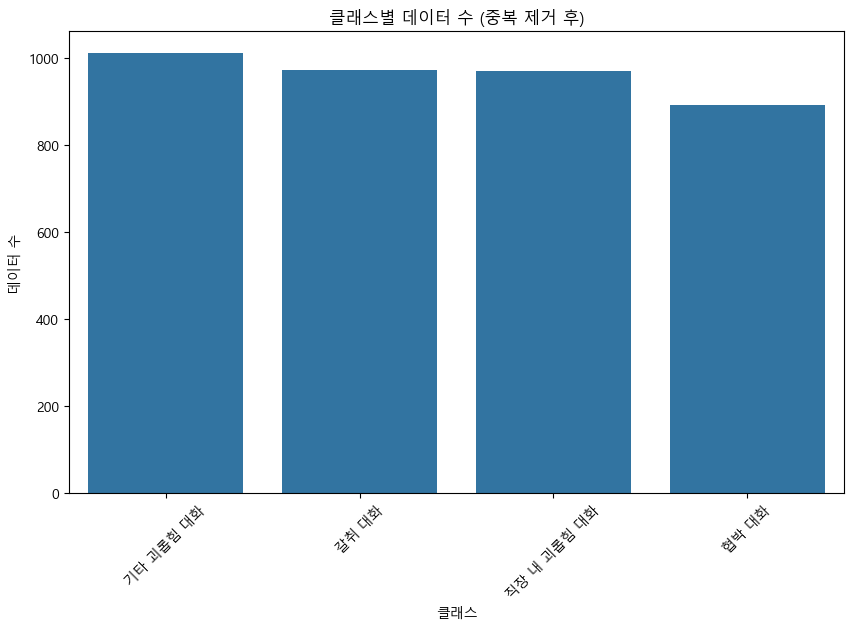

In [15]:
# 클래스별 데이터 수 확인
class_counts = df_cleaned['class'].value_counts()
print("--- 클래스별 데이터 수 ---")
print(class_counts)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('클래스별 데이터 수 (중복 제거 후)')
plt.xlabel('클래스')
plt.ylabel('데이터 수')
plt.xticks(rotation=45)
plt.show()

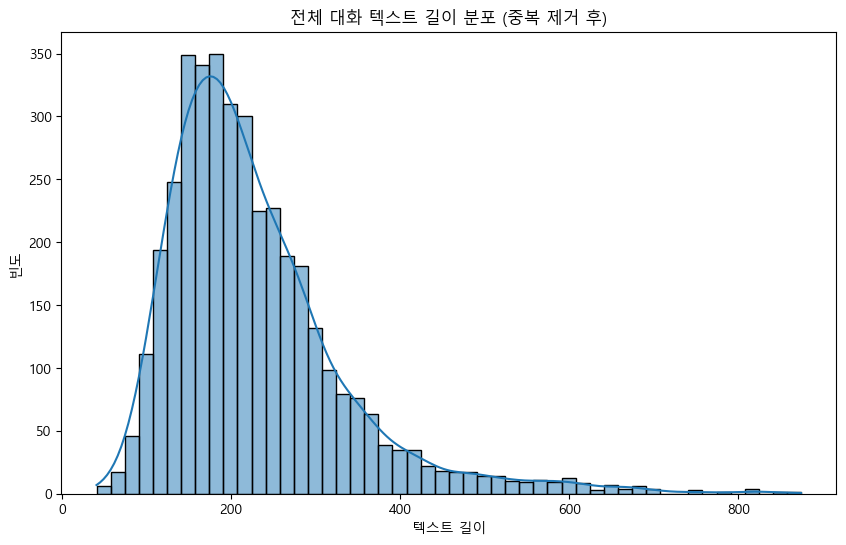

In [16]:
# 전체 텍스트 길이 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['text_length'], bins=50, kde=True)
plt.title('전체 대화 텍스트 길이 분포 (중복 제거 후)')
plt.xlabel('텍스트 길이')
plt.ylabel('빈도')
plt.show()

--- 클래스별 텍스트 길이 통계량 ---
              count        mean         std   min    25%    50%    75%    max
class                                                                        
갈취 대화         973.0  216.218911   99.839070  45.0  147.0  191.0  263.0  678.0
기타 괴롭힘 대화    1011.0  213.264095  106.750382  41.0  145.0  188.0  248.5  874.0
직장 내 괴롭힘 대화   970.0  237.498969  103.890633  41.0  167.0  217.0  282.0  843.0
협박 대화         892.0  246.089686  106.139590  57.0  176.0  220.0  288.0  818.0


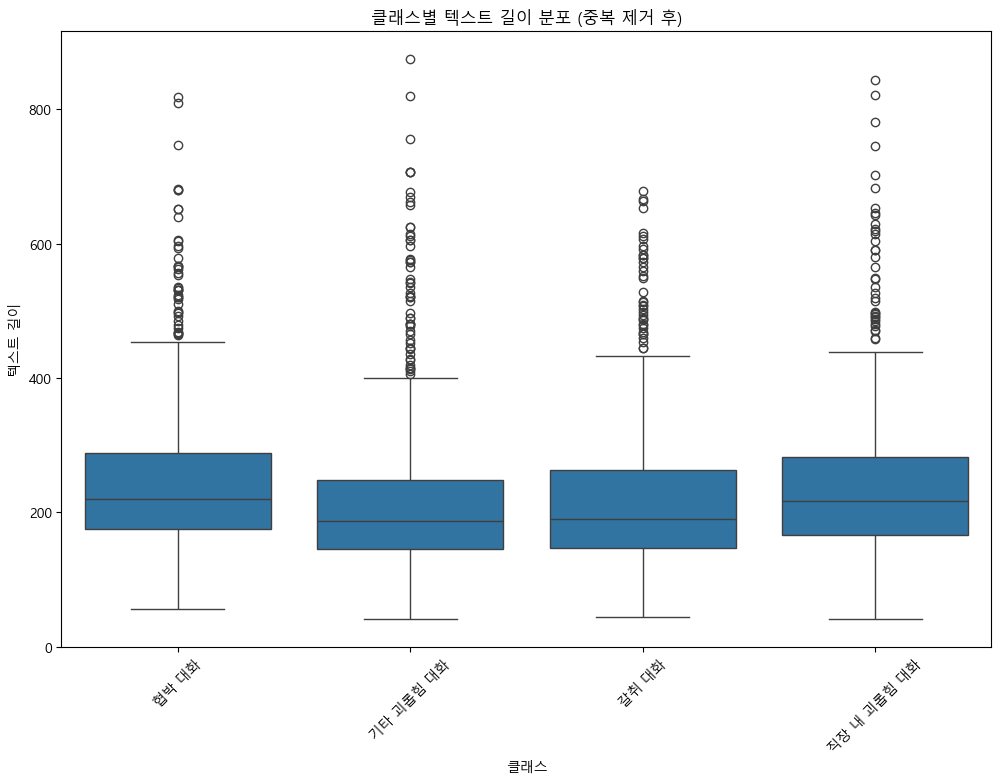

In [17]:
# 클래스별 텍스트 길이 통계량
print("--- 클래스별 텍스트 길이 통계량 ---")
print(df_cleaned.groupby('class')['text_length'].describe())

# 시각화 (Boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='text_length', data=df_cleaned)
plt.title('클래스별 텍스트 길이 분포 (중복 제거 후)')
plt.xlabel('클래스')
plt.ylabel('텍스트 길이')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 각 클래스별로 반복
for cls in df_cleaned['class'].unique():
    # 해당 클래스의 대화만 추출
    class_conversations = df[df['class'] == cls]['conversation']
    
    # 모든 대화 텍스트를 하나로 합치기
    all_text = ' '.join(class_conversations)
    
    # 한글과 공백만 남기기
    processed_text = re.sub(r'[^가-힣\s]', '', all_text)
    
    # 단어 분리
    words = processed_text.split()
    
    # 불용어 및 한 글자 단어 제거
    filtered_words = [word for word in words if word not in stopwords and len(word) > 1]
    
    # 단어 빈도 계산
    word_counts = Counter(filtered_words)
    
    print(f"### {cls}에서 자주 나오는 단어 30개 ###")
    print(word_counts.most_common(30))
    print("\n")

### 협박 대화에서 자주 나오는 단어 30개 ###
[('제발', 397), ('지금', 337), ('니가', 241), ('그래', 228), ('죄송합니다', 222), ('아니', 219), ('그럼', 208), ('우리', 199), ('어떻게', 198), ('무슨', 194), ('정말', 172), ('너가', 162), ('제가', 159), ('아니야', 155), ('그렇게', 151), ('당장', 148), ('살려주세요', 128), ('나도', 126), ('이제', 121), ('빨리', 120), ('이렇게', 112), ('알아', 112), ('그게', 111), ('이거', 104), ('없어', 101), ('거야', 96), ('너도', 95), ('나한테', 94), ('그건', 90), ('당신', 89)]


### 기타 괴롭힘 대화에서 자주 나오는 단어 30개 ###
[('아니', 375), ('그래', 245), ('지금', 233), ('아니야', 225), ('그렇게', 223), ('무슨', 222), ('니가', 218), ('죄송합니다', 217), ('그럼', 204), ('우리', 184), ('너가', 162), ('이거', 152), ('제발', 151), ('어떻게', 150), ('여기', 149), ('제가', 145), ('그만해', 139), ('고객님', 128), ('이렇게', 114), ('근데', 111), ('미안해', 108), ('손님', 107), ('나도', 104), ('말이', 104), ('그게', 103), ('너는', 103), ('빨리', 102), ('그만', 101), ('나한테', 98), ('하지마', 96)]


### 갈취 대화에서 자주 나오는 단어 30개 ###
[('그럼', 366), ('이거', 362), ('아니', 343), ('지금', 316), ('그래', 273), ('돈이', 255), ('없어', 241), ('안돼', 233),

일상대화 데이터 개수: 기존 레이블들의 합계(예: 3000~4000개)보다 훨씬 많은 수를 지정하는 것이 합리적입니다. 최소 5000개 이상을 고려해볼 수 있습니다.

- 이유: 딥러닝 모델이 일반적인 대화와 악의적인 대화를 명확히 구분하려면, 일상대화 데이터가 압도적으로 많아야 학습이 효과적입니다.

텍스트 길이: 기존 레이블들의 평균 텍스트 길이(대략 300~500자)보다 길고 다양한 길이를 포함하도록 지정하는 것이 좋습니다.

- 평균 텍스트 길이: 600자 이상을 고려하고, 최소 길이와 최대 길이의 범위를 넓게 설정해야 합니다.

- 이유: 긴 대화는 문맥이 복잡하고, 다양한 주제가 포함될 수 있어 일반적인 대화의 특징을 잘 반영합니다.